In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pothole-detection-dataset/normal/208.jpg
/kaggle/input/pothole-detection-dataset/normal/333.jpg
/kaggle/input/pothole-detection-dataset/normal/45.jpg
/kaggle/input/pothole-detection-dataset/normal/56.jpg
/kaggle/input/pothole-detection-dataset/normal/89.jpg
/kaggle/input/pothole-detection-dataset/normal/20.jpg
/kaggle/input/pothole-detection-dataset/normal/275.jpg
/kaggle/input/pothole-detection-dataset/normal/212.jpg
/kaggle/input/pothole-detection-dataset/normal/239.jpg
/kaggle/input/pothole-detection-dataset/normal/58.jpg
/kaggle/input/pothole-detection-dataset/normal/150.jpg
/kaggle/input/pothole-detection-dataset/normal/6.jpg
/kaggle/input/pothole-detection-dataset/normal/109.jpg
/kaggle/input/pothole-detection-dataset/normal/149.jpg
/kaggle/input/pothole-detection-dataset/normal/187.jpg
/kaggle/input/pothole-detection-dataset/normal/76.jpg
/kaggle/input/pothole-detection-dataset/normal/71.jpg
/kaggle/input/pothole-detection-dataset/normal/342.jpg
/kaggle/input/potho

**IMPORTING LIBRARIES**

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt

**CHECKING IMAGES FOR CONFIRMATION**

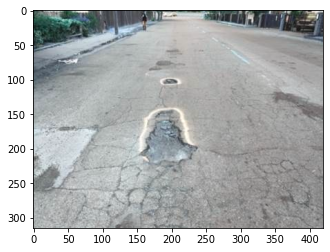

In [3]:
plt.imshow(cv2.imread("/kaggle/input/pothole-detection-dataset/potholes/125.jpg"))

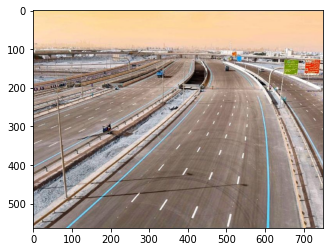

In [4]:
plt.imshow(cv2.imread("/kaggle/input/pothole-detection-dataset/normal/11.jpg"))

**Part 1 - Data Preprocessing**

****Splitting dataset into training and validation and preprocessing the training set****

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)
training_set = train_datagen.flow_from_directory('/kaggle/input/pothole-detection-dataset',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 subset="training")

Found 546 images belonging to 2 classes.


**Preprocessing the validation set**

In [6]:
validation_generator = train_datagen.flow_from_directory(
    "/kaggle/input/pothole-detection-dataset", # same directory as training data
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation')

Found 135 images belonging to 2 classes.


**Part 2 - Building the CNN**

**Initialising the CNN**

In [7]:
cnn = tf.keras.models.Sequential()

**Step 1 - Convolution**

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

**Step 2 - Pooling**

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

**Adding a second convolutional layer**

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

**Step 3 - Flattening**

In [11]:
cnn.add(tf.keras.layers.Flatten())

**Step 4 - Full Connection**

In [12]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

**Step 5 - Output Layer**

In [13]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

**Part 3 - Training the CNN**

**Compiling the CNN**

In [14]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Training the CNN on the Training set and evaluating it on the Validation set**

In [15]:
cnn.fit(x = training_set, validation_data = validation_generator, epochs = 25)

Epoch 1/25
18/18 [==============================] - 25s 1s/step - loss: 0.7215 - accuracy: 0.5205 - val_loss: 0.6564 - val_accuracy: 0.5407
Epoch 2/25
18/18 [==============================] - 14s 803ms/step - loss: 0.6174 - accuracy: 0.7079 - val_loss: 0.5416 - val_accuracy: 0.7037
Epoch 3/25
18/18 [==============================] - 14s 774ms/step - loss: 0.4599 - accuracy: 0.7723 - val_loss: 0.4641 - val_accuracy: 0.7926
Epoch 4/25
18/18 [==============================] - 14s 749ms/step - loss: 0.3160 - accuracy: 0.8812 - val_loss: 0.4201 - val_accuracy: 0.8148
Epoch 5/25
18/18 [==============================] - 14s 844ms/step - loss: 0.2314 - accuracy: 0.9021 - val_loss: 0.3638 - val_accuracy: 0.8074
Epoch 6/25
18/18 [==============================] - 14s 770ms/step - loss: 0.2849 - accuracy: 0.8693 - val_loss: 0.3994 - val_accuracy: 0.8296
Epoch 7/25
18/18 [==============================] - 15s 778ms/step - loss: 0.1842 - accuracy: 0.9287 - val_loss: 0.3920 - val_accuracy: 0.8222
Ep

**Part 4 - Making a single prediction**

In [16]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/kaggle/input/pothole-detection-dataset/normal/341.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'pothole'
else:
  prediction = 'normal'

In [17]:
print(prediction)

normal
